# Project: Investigate a Dataset "No-show appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Questions
<blockquote>
    <ol>
    <li>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</li>
    <li>what is the effect of having disease base on age?</li>
    <li>Is the period between Appointment Day and Scheduled Day affect of shown up?</li>
    </ol>
</blockquote>


In [2]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sn


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [10]:
df = pd.read_csv('dataset.csv')

df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
#replace Handcap with Handicap
# lowercase #space with _
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
df['appointment_after_7days'] = df['AppointmentDay'] - df['ScheduledDay'] > np.timedelta64(7, 'D')
df = df[(df['Age'] < 100) & (df['Age'] > 18)]
def noShowToShow(value):
    if(value=='Yes'):
        return False
    return True

df['No-show'] = df['No-show'].apply(noShowToShow)
df.rename({'Handcap':'Handicap','ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day','No-show':'shown'},axis=1,inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_"), inplace=True)

df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,shown,appointment_after_7days
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,True,False
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,True,False
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,True,False
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,True,False
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,True,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81649 entries, 0 to 110526
Data columns (total 13 columns):
gender                     81649 non-null object
scheduled_day              81649 non-null datetime64[ns]
appointment_day            81649 non-null datetime64[ns]
age                        81649 non-null int64
neighbourhood              81649 non-null object
scholarship                81649 non-null int64
hipertension               81649 non-null int64
diabetes                   81649 non-null int64
alcoholism                 81649 non-null int64
handicap                   81649 non-null int64
sms_received               81649 non-null int64
shown                      81649 non-null bool
appointment_after_7days    81649 non-null bool
dtypes: bool(2), datetime64[ns](2), int64(7), object(2)
memory usage: 7.6+ MB



### There are no missing data 
>because the number of cell in each column is the same as the number of row for the whole dataset as show in the code before. so no need for additional steps.




### Data Cleaning 
<ul>
<li>Removing PatientID and AppointmentID colomns, because it has no effect on the analysis</li>
<li>Changing the data type of AppointmentDay and ScheduledDay from string to datetime to make easier to analyze.</li>
<li>Change the type of No-show and name columns to boolen and make the values more understandable</li>
<li>Create a new column called appointment_after_7days to measure the effect of period of appointment on show up</li>
<li>Filter Age column  from 18 to 100</li>
<li>Standarize column name format by make it lowecase and replace spaces by underscore</li>


</ul>

<a id='eda'></a>
## Exploratory Data Analysis


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### let as compare the relation between 'shown' and other variables using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bfa3cc780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0c000dce80>]], dtype=object)

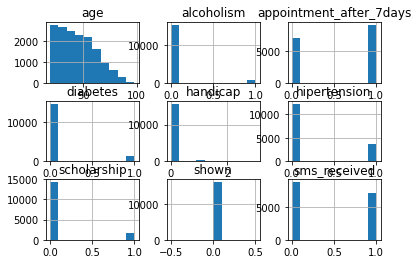

In [34]:
df[df['shown']==False].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bf8c9b780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0bf9b5df98>]], dtype=object)

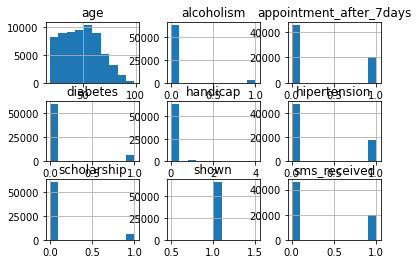

In [35]:
df[df['shown']==True].hist()


#### From the histogram we can see that receiveing SMS will affect on show up.

### The effect of : scholar ship, Hipertension, Diabetes, Alcoholism, Handicap on showing up.
#### The result from the histogram is there are no relation between diseases and showning up for the appointment.



#### based of comparing the two histograms we conclude that all factor has no effect of the showing up except receiving the message and the time between appointment day and scheduled day 


### what is the effect of having disease base on age?

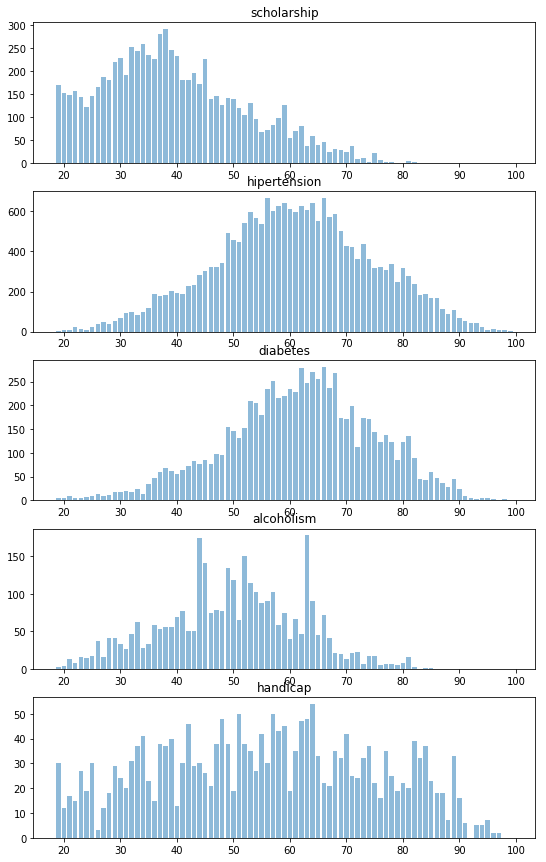

In [27]:
grouped_values = df.groupby(['age']).sum()
fig, axs = plt.subplots(5,figsize=(9, 15))
count = 0

for col in grouped_values.columns[:5]:
    data = df.groupby(['age']).sum()[col]
    axs[count].bar(data.index,data.values,alpha=0.5)
    axs[count].set_title(col)
    count+=1


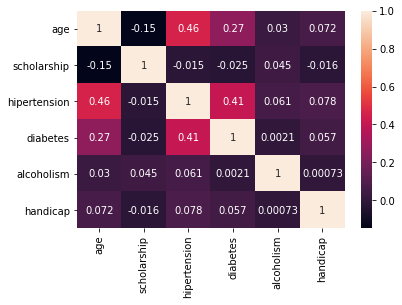

In [37]:
df_filtered = df[df.columns[:-3]]
corrMatrix = df_filtered.corr()
sn.heatmap(corrMatrix, annot=True)

#### Based on the bar chart and correlation matrix above
#### most of the diseases have no realation to age except Hipertension and Diabetes are more related to the old man than yange


### Is the period between Appointment Day and Scheduled Day affect of shown up?

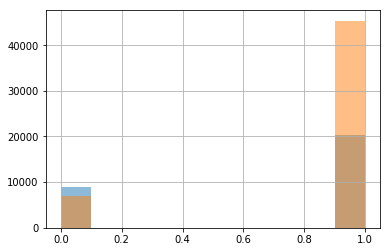

In [9]:
df[df['appointment_after_7days']==True]['shown'].hist(alpha=0.5)
df[df['appointment_after_7days']==False]['shown'].hist(alpha=0.5)

#### Based on the above histogram we can see the number of people who are not shown for appointment are close. but if we compare it to the total number we can see that the ratio of people shown with appointment period less than 7days is more that with more days. 

<a id='conclusions'></a>
## Conclusions
<blockquote><strong>Result</strong>: In conclusion, we got two important result from this analysis. First, To reduce number of appointment that people not shown up, the hospital should send SMS to patients. Secondly, some diseases effect older people more than younger, So we have to be careful about it and must check it periodically.
    <ol>
    <li>To reduce number of appointment that people not shown up, the hospital should send SMS to patients</li>
    <li>Some diseases effect older people more than younger, So we have to be careful about it and must check it periodically</li>
    <li>The time between the scheduled day appointment day should be as low as possible to avoid not showing up </li>
    </ol>
</blockquote>


<blockquote><strong>Limitations:</strong> there are couple of limitations in our data
    <ol>
    <li>Most of the data are Categorical data, so it is harder to perform statictical analysis.</li>
    <li>Need more detail to get the reason for not showing up. espitialy the personal factors.</li>
    </ol>
</blockquote>


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])